## Exercício Prático 02 - Syanne Tavares

### Zero Reais de Funções Reais

#### 01. Fazer uma Função que dado uma função f(x E a R) E a R mostre uma tabela com cada x avaliando o sinal de f(x)
- Permita que o usuário escolha o intervalo ou os valores de x

- Dê um valor padrão para o intervalo caso o usuário não queira 
escolher

- Desafio: fazer a tabela mostrando apenas os valores que trocam de 
sinal.

In [1]:
############################################# código ###############################################################################################

import pandas as pd, numpy as np

def AvaliaSinalFunc(coeficientes,ValoresX=[-1,1],IsIntervalo = True):
    """Função que avalia os sinais de uma função em valores de x ou em dado intervalo
    Parâmetros:
    coeficientes: coeficientes da função
    valoresX: Intervalo ou valores de x que deverão ser considerado na análise da função. Por padrão considera o intervalo de -1 até 1.
    IsIntervalo: por padrão recebe True. Se false siginifica que o parâmetro intervalo se refere aos valores de X que deverão ser considerados na análise."""
    #contruir a função
    func = np.poly1d(coeficientes)
    analise={
        'x': ["f(x)"," sinal"]
    }
    desafio = {'x': ["f(x)"," sinal"]}
    if IsIntervalo :
        aux=list([func(ValoresX[0]), "+" if func(ValoresX[0]) > 0 else "-" ])# variável auxiliar pro desafio -> verificar apenas as trocas de sinal
        desafio[f'{ValoresX[0]}']=aux

        for x in range(ValoresX[0],ValoresX[1]):
            analise[f'{x}'] = list([func(x), "+" if func(x) > 0 else "-" ])
            
            if analise[f'{x}'][1] != aux[1]: # se tiver mudança de sinal
                #guardar o dicionário do desafio
                desafio[f'{x}'] = analise[f'{x}']
                aux=analise[f'{x}']

    else: 
        for x in ValoresX:
            analise[f'{x}'] = list([func(x), "+" if func(x) > 0 else "-" ])

            if analise[f'{x}'][1] != aux[1]: # se tiver mudança de sinal
                #guardar o dicionário do desafio
                desafio[f'{x}'] = analise[f'{x}']
                aux=analise[f'{x}']
    
    tabelaAnalise=pd.DataFrame(analise)
    tabelaDesafio = pd.DataFrame(desafio)
    ##retorno ao usuário
    print("{:#^60}".format("Análise do sinal da função"))
    print(f"\n f(x) = \n{func}\n")

    print("{:#^60}".format("Tabela de análise"))
    print(tabelaAnalise)
    print("{:#^60}".format("Tabela do desafio"))

    print(tabelaDesafio)

def ExercicioAvaliaSinalFunc():
    coeficientes=list(map(int,input("Insira valoresdos coeficientes da função separados por um espaço: ").split()))
    IsIntervalo = True if input("Insira 1 pra escolher a opção de inserir um intervalo ou 2 pra inserir os valores de x pra análise da função: ") == "1" else False
    ValoresX =( list(map(int,input("Insira valores do intervalo da função separados por um espaço: ").split())) 
                if IsIntervalo 
                else list(map(int,input("Insira valores de x separados por um espaço: ").split())) )
    AvaliaSinalFunc(coeficientes,ValoresX,IsIntervalo)


In [2]:
############################################# Resolução ###############################################################################################

ExercicioAvaliaSinalFunc()

#################Análise do sinal da função#################

 f(x) = 
    3     2
-1 x + 3 x + 4 x + 9

#####################Tabela de análise######################
        x -1  0
0    f(x)  9  9
1   sinal  +  +
#####################Tabela do desafio######################
        x -1
0    f(x)  9
1   sinal  +


### 2. Outra forma de isolar as raízes é através da análise gráfica.

Pode-se utilizar uma das seguintes soluções:

1. Esboçar o gráfico da solução 𝑓 𝑥 .

2. Obter uma equação equivalente 𝑔 𝑥 = ℎ 𝑥 usando 𝑓 𝑥 = 0;
Esboçar as funções 𝑔 𝑥 e ℎ 𝑥 e verificar onde elas se
interceptam.

3. Usar programas que traçam gráficos.

In [3]:
############################################# código ###############################################################################################

import numpy as np
import matplotlib as plt

def ExercicioAvaliaGrafico():
    """exercicio de Gerar gráficos pra funções polinomiais"""

    coeficientes=list(map(int,input("Insira valoresdos coeficientes da função separados por um espaço: ").split()))
    valoresX =list(map(int,input("Insira valores do intervalo da função separados por um espaço: ").split()))

    print("########### Função f(x) ###########")
    GeraGraficoFx(coeficientes,valoresX)

def GeraGraficoFx(coeficientes,ValoresX) :
  """Gera gráficos pra funções polinomiais"""
  # Definindo conjunto de 1000 valores de x entre 0 e 3
  x = np.linspace(ValoresX[0],ValoresX[1],1000)
  # definindo vetor y nas mesmas dimensões que o vetor x
  y = np.array(x.shape)
  #definindo y, ou seja, aplicando x na função f(x) = x^3 - 2x^2 + 7
  y = np.poly1d(coeficientes)

  #tamanho da figura
  plt.figure(figsize = (10,4))
  #define X, Y, tipo de marcador(nenhum nesse caso) e cor
  plt.plot(x,y(x), marker = '', color = 'green')     
  #define título
  plt.title(f'Gráfico \n{y}')
  #define nome a mostrar no eixo x
  plt.xlabel('Eixo x')
  #define nome a mostrar no eixo y
  plt.ylabel('Eixo y')
  #faz a plotagem

  """Gera gráficos pra funções polinomiais equivalentes"""
  # Definindo conjunto de 1000 valores de x entre 0 e 3
  x = np.linspace(ValoresX[0],ValoresX[1],1000)
  # definindo vetor y nas mesmas dimensões que o vetor x
  y = np.array(x.shape) 
  coeficientes2=[-coeficientes[0]]
  for i in range(1,len(coeficientes)): coeficientes2.append(0)

  f1 = np.poly1d(coeficientes2)
  f2 = np.poly1d(coeficientes[1:])

  #tamanho da figura
  plt.figure(figsize = (10,4))
  #define X, Y, tipo de marcador(nenhum nesse caso) e cor
  plt.plot(x,f1(x), label =f'\n{f1}' ,marker = '', color = 'green')
  plt.plot(x,f2(x),label =f"\n{f2}" , marker = '', color = 'red')     
  #define título
  plt.title(f'Gráficos Equivalentes: \n h(x) = {f1}  \n g(x) ={f2} ')
  #define nome a mostrar no eixo x
  plt.xlabel('Eixo x')
  #define nome a mostrar no eixo y
  plt.ylabel('Eixo y')
  #faz a plotagem
  
  plt.legend()
  plt.show()
    
############################################# Resolução ###############################################################################################
ExercicioAvaliaGrafico()

########### Função f(x) ###########


AttributeError: module 'matplotlib' has no attribute 'figure'

C:\Users\syann\AppData\Local\Temp\ipykernel_15496\2334061850.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


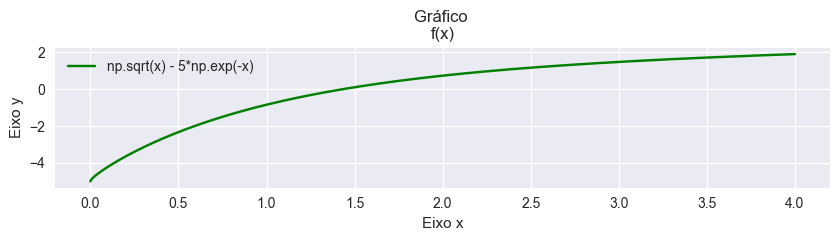

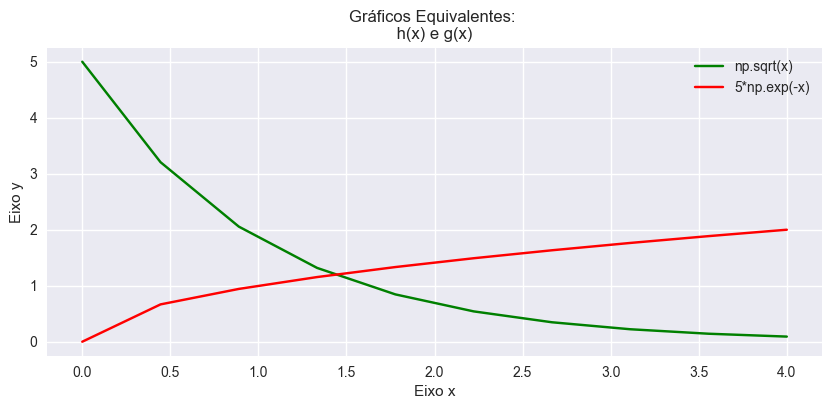

In [ ]:
############################################# código ###############################################################################################
import numpy as np
import matplotlib.pyplot as plt
import math
# exemplos 2 slide

def GeraGraficos(f,g,h,legendas) :
  """Gera gráfico de uma função e de suas equivalentes que recebe como parâmetro"""
  plt.style.use("seaborn")
  x = np.linspace(0,4,1000)
  y = np.array(x.shape)

  #inserindo fução principal - GRÁFICO 1
  

  #configurando gráfico
  plt.figure(figsize = (10,4))
  plt.subplot(2, 1, 1)
  plt.title(f'Gráfico \nf(x)')
  plt.xlabel('Eixo x')
  plt.ylabel('Eixo y')

  #faz a plotagem
  plt.plot(x,f(x),label =legendas[0], marker = '', color = 'green') 
  plt.legend()    

  ########## GRÁFICO 2

  x = np.linspace(0,4,10)
  # definindo vetor y nas mesmas dimensões que o vetor x
  y = np.array(x.shape)
  #INSERINDO FUNÇÕES EQUIVALENTES
  plt.subplot(2, 1, 1)

  #CONFIGURANDO GRÁFICO
  plt.figure(figsize = (10,4))
  plt.title(f'Gráficos Equivalentes: \n h(x) e g(x) ')
  plt.xlabel('Eixo x')
  plt.ylabel('Eixo y')

  #faz a plotagem
  plt.plot(x,h(x), label =legendas[1],marker = '', color = 'green')
  plt.plot(x,g(x),label =legendas[2], marker = '', color = 'red')     
  plt.legend()
  plt.show()

############################################# Resolução ###############################################################################################
GeraGraficos(lambda x : np.sqrt(x) - 5*np.exp(-x),lambda x: np.sqrt(x),lambda x:  5*np.exp(-x),["np.sqrt(x) - 5*np.exp(-x)","np.sqrt(x)","5*np.exp(-x)"])

C:\Users\syann\AppData\Local\Temp\ipykernel_15800\2334061850.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\syann\AppData\Local\Temp\ipykernel_15800\2015724376.py:3: RuntimeWarning: divide by zero encountered in log10
  GeraGraficos(lambda x :x*np.log10(x) - 1 ,lambda x: x*np.log10(x),lambda x:  1 + 0*x,["nx*log10(x) - 1","*np.log10(x)","1"])
C:\Users\syann\AppData\Local\Temp\ipykernel_15800\2015724376.py:3: RuntimeWarning: invalid value encountered in multiply
  GeraGraficos(lambda x :x*np.log10(x) - 1 ,lambda x: x*np.log10(x),lambda x:  1 + 0*x,["nx*log10(x) - 1","*np.log10(x)","1"])


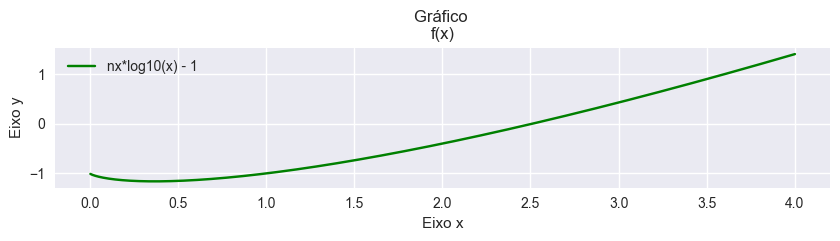

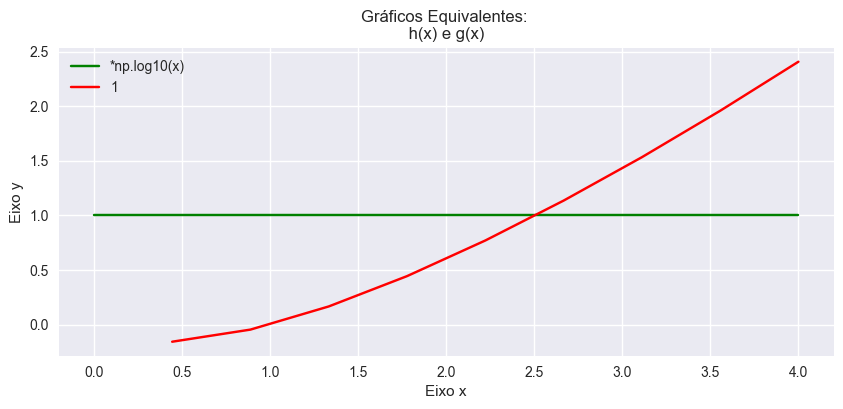

In [ ]:
############################################# Resolução ###############################################################################################
#EXEMPLO 3
GeraGraficos(lambda x :x*np.log10(x) - 1 ,lambda x: x*np.log10(x),lambda x:  1 + 0*x,["nx*log10(x) - 1","*np.log10(x)","1"])
plt.show()


### 3. Implemente o método da bissecção e encontre as raízes das seguintes equações:

▪ 𝑓 𝑥 = 𝑥^3 − 9𝑥 + 3

▪ 𝑓 𝑥 = 𝑥 − 5𝑒^−𝑥

▪ 𝑓 𝑥 = 𝑥𝑙𝑜𝑔 𝑥 − 1

▪ Use como critério de parada o valor mínimo de precisão do
computador

▪ Mostre todos os passos do algoritmo com os valores de 𝑎𝑖, 𝑏𝑖 e 𝑝i

In [ ]:
############################################# código ###############################################################################################

import math
def bisseccao(funcao,intervalo,erro):
  """Função que realiza o método da bissecção pra achar a raiz real de uma função.
  Parâmetros:
  função : função pro cálculo ex: função = lambda x:x**3-9*x+3 
  intevalo: lista contendo o intervalo considerado da função. ex: [-1,1]
  erro: critério de parada pra precisão requerida ex:  0.000000001 """

  ai = intervalo[0] 
  bi = intervalo[1]
  i = 0 # variável q armazena o número de iterações realizadas ( bissecções realizadas)
  # verificar se o método se aplica a função
  if funcao(ai)*funcao(bi)< 0:

    while abs(bi-ai) > erro: # testa o critério de parada: enquanto a diferença entre intervalo for maior que o erro -> enquanto f(pi) > precisão
      #calcula o ponto médio
      pi = (ai + bi)/2
      print("a{}: {};  b{}: {};  p{}: {};".format(i,ai,i,bi,i,pi)) # Mostre todos os passos do algoritmo com os valores de 𝑎𝑖, 𝑏𝑖 e 𝑝i

      # realiza a bissecção no intervalo verificando o sinal das extremidades na função
      if funcao(ai)*funcao(pi)<0: # significa que a raíz pertence a esse intervalo -> está mais a esquerda de bi
          bi = pi
      else: # a raiz está mais a direita de ai -> diminui o intervalo fazendo ai receber o ponto médio calculado
          ai = pi
      i+=1
    return pi
  else:
    print("Não existe raíz real neste intervalo!")


In [ ]:
# aplicação bissecção
def precisao_maquina():
    """Função que calcula a precisão da máquina com referência igual a 1"""
    A=1
    S=2

    while(S>1):
        A=A/2
        S=1+A
    prec=2*A

    return prec
############################################# Resolução ###############################################################################################

print(f'\033[32m\n\nRaiz de 𝑥^3 − 9𝑥 + 3 : {bisseccao(lambda x:x**3-9*x+3, [2,4], precisao_maquina())}\033[m')


a0: 2;  b0: 4;  p0: 3.0;
a1: 2;  b1: 3.0;  p1: 2.5;
a2: 2.5;  b2: 3.0;  p2: 2.75;
a3: 2.75;  b3: 3.0;  p3: 2.875;
a4: 2.75;  b4: 2.875;  p4: 2.8125;
a5: 2.8125;  b5: 2.875;  p5: 2.84375;
a6: 2.8125;  b6: 2.84375;  p6: 2.828125;
a7: 2.8125;  b7: 2.828125;  p7: 2.8203125;
a8: 2.8125;  b8: 2.8203125;  p8: 2.81640625;
a9: 2.81640625;  b9: 2.8203125;  p9: 2.818359375;
a10: 2.81640625;  b10: 2.818359375;  p10: 2.8173828125;
a11: 2.81640625;  b11: 2.8173828125;  p11: 2.81689453125;
a12: 2.81689453125;  b12: 2.8173828125;  p12: 2.817138671875;
a13: 2.81689453125;  b13: 2.817138671875;  p13: 2.8170166015625;
a14: 2.81689453125;  b14: 2.8170166015625;  p14: 2.81695556640625;
a15: 2.81689453125;  b15: 2.81695556640625;  p15: 2.816925048828125;
a16: 2.81689453125;  b16: 2.816925048828125;  p16: 2.8169097900390625;
a17: 2.8169097900390625;  b17: 2.816925048828125;  p17: 2.8169174194335938;
a18: 2.8169097900390625;  b18: 2.8169174194335938;  p18: 2.816913604736328;
a19: 2.816913604736328;  b19: 2.81

In [ ]:
print(f'\033[32m\n\nRaiz de 𝑥 − 5𝑒−𝑥 = {bisseccao(lambda x : x - 5*math.exp(-x), [1,2], precisao_maquina())}\033[m')

a0: 1;  b0: 2;  p0: 1.5;
a1: 1;  b1: 1.5;  p1: 1.25;
a2: 1.25;  b2: 1.5;  p2: 1.375;
a3: 1.25;  b3: 1.375;  p3: 1.3125;
a4: 1.3125;  b4: 1.375;  p4: 1.34375;
a5: 1.3125;  b5: 1.34375;  p5: 1.328125;
a6: 1.3125;  b6: 1.328125;  p6: 1.3203125;
a7: 1.3203125;  b7: 1.328125;  p7: 1.32421875;
a8: 1.32421875;  b8: 1.328125;  p8: 1.326171875;
a9: 1.326171875;  b9: 1.328125;  p9: 1.3271484375;
a10: 1.326171875;  b10: 1.3271484375;  p10: 1.32666015625;
a11: 1.32666015625;  b11: 1.3271484375;  p11: 1.326904296875;
a12: 1.32666015625;  b12: 1.326904296875;  p12: 1.3267822265625;
a13: 1.32666015625;  b13: 1.3267822265625;  p13: 1.32672119140625;
a14: 1.32672119140625;  b14: 1.3267822265625;  p14: 1.326751708984375;
a15: 1.32672119140625;  b15: 1.326751708984375;  p15: 1.3267364501953125;
a16: 1.32672119140625;  b16: 1.3267364501953125;  p16: 1.3267288208007812;
a17: 1.32672119140625;  b17: 1.3267288208007812;  p17: 1.3267250061035156;
a18: 1.32672119140625;  b18: 1.3267250061035156;  p18: 1.326723

In [ ]:
print(f'\033[32m\n\nRaiz de 𝑥log(x) -1 = {bisseccao(lambda x : x*math.log10(x) - 1, [2,3], precisao_maquina())}\033[m')

a0: 2;  b0: 3;  p0: 2.5;
a1: 2.5;  b1: 3;  p1: 2.75;
a2: 2.5;  b2: 2.75;  p2: 2.625;
a3: 2.5;  b3: 2.625;  p3: 2.5625;
a4: 2.5;  b4: 2.5625;  p4: 2.53125;
a5: 2.5;  b5: 2.53125;  p5: 2.515625;
a6: 2.5;  b6: 2.515625;  p6: 2.5078125;
a7: 2.5;  b7: 2.5078125;  p7: 2.50390625;
a8: 2.50390625;  b8: 2.5078125;  p8: 2.505859375;
a9: 2.505859375;  b9: 2.5078125;  p9: 2.5068359375;
a10: 2.505859375;  b10: 2.5068359375;  p10: 2.50634765625;
a11: 2.505859375;  b11: 2.50634765625;  p11: 2.506103515625;
a12: 2.506103515625;  b12: 2.50634765625;  p12: 2.5062255859375;
a13: 2.506103515625;  b13: 2.5062255859375;  p13: 2.50616455078125;
a14: 2.50616455078125;  b14: 2.5062255859375;  p14: 2.506195068359375;
a15: 2.50616455078125;  b15: 2.506195068359375;  p15: 2.5061798095703125;
a16: 2.5061798095703125;  b16: 2.506195068359375;  p16: 2.5061874389648438;
a17: 2.5061798095703125;  b17: 2.5061874389648438;  p17: 2.506183624267578;
a18: 2.506183624267578;  b18: 2.5061874389648438;  p18: 2.506185531616211

In [ ]:
print(f'\033[32m\n\nx^3 - 9 + 3 = {bisseccao(lambda x : x**3-9*x +3 , [0,1], 10**-9)}\033[m')

a0: 0;  b0: 1;  p0: 0.5;
a1: 0;  b1: 0.5;  p1: 0.25;
a2: 0.25;  b2: 0.5;  p2: 0.375;
a3: 0.25;  b3: 0.375;  p3: 0.3125;
a4: 0.3125;  b4: 0.375;  p4: 0.34375;
a5: 0.3125;  b5: 0.34375;  p5: 0.328125;
a6: 0.328125;  b6: 0.34375;  p6: 0.3359375;
a7: 0.3359375;  b7: 0.34375;  p7: 0.33984375;
a8: 0.3359375;  b8: 0.33984375;  p8: 0.337890625;
a9: 0.3359375;  b9: 0.337890625;  p9: 0.3369140625;
a10: 0.3369140625;  b10: 0.337890625;  p10: 0.33740234375;
a11: 0.33740234375;  b11: 0.337890625;  p11: 0.337646484375;
a12: 0.33740234375;  b12: 0.337646484375;  p12: 0.3375244140625;
a13: 0.3375244140625;  b13: 0.337646484375;  p13: 0.33758544921875;
a14: 0.33758544921875;  b14: 0.337646484375;  p14: 0.337615966796875;
a15: 0.33758544921875;  b15: 0.337615966796875;  p15: 0.3376007080078125;
a16: 0.3376007080078125;  b16: 0.337615966796875;  p16: 0.33760833740234375;
a17: 0.33760833740234375;  b17: 0.337615966796875;  p17: 0.3376121520996094;
a18: 0.33760833740234375;  b18: 0.3376121520996094;  p18: 